<div class="alert alert-success">
    
<h2><center>Hackathon Data Projet</center></h2>
    
<center>"Data Visalization et Machine Learning"</br></center>
<center>|Analysis Jupiter Notebook|</br>
</center></div>

### Import des bibliothèques nécessaires pour la prédiction

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
scaler = StandardScaler()
label_encoder = LabelEncoder()

### Sélection des colonnes nécessaires à la prédiction

In [2]:
column_to_let = ["category","subcategory","subsubcategory", "is_view","is_cart","is_purchase","p_views","p_carts","p_purchases","user_views","user_carts","user_purchases"]

In [3]:
data = pd.read_csv("C:/Users/djibr/Desktop/Sc/Others/Ac/archive/datasetreco.csv", sep=";")
df= pd.read_csv("C:/Users/djibr/Desktop/Sc/Others/Ac/archive/datasetreco.csv", sep=";")[column_to_let]

In [4]:
df["is_purchase"].value_counts()

is_purchase
0    290441
1     15469
Name: count, dtype: int64

In [5]:
df.drop_duplicates()

,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases
0,NaN,NaN,NaN,1,0,0,532,1,0,1,1,0
1,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0
2,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0
3,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
5,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
305817,computers,peripherals,wifi,1,0,0,37,8,10,79,0,0
305819,computers,peripherals,wifi,1,0,0,37,5,6,79,0,0
305821,computers,peripherals,wifi,1,0,0,19,2,2,79,0,0
305837,computers,peripherals,wifi,1,0,0,22,4,2,1,1,0


### Normalisation des données pour les datasets de train et de prédiction

In [6]:
df['category'] = label_encoder.fit_transform(df['category'])
df['subcategory'] = label_encoder.fit_transform(df['subcategory'])
df['subsubcategory'] = label_encoder.fit_transform(df['subsubcategory'])

In [7]:
data['category'] = label_encoder.fit_transform(data['category'])
data['subcategory'] = label_encoder.fit_transform(data['subcategory'])
data['subsubcategory'] = label_encoder.fit_transform(data['subsubcategory'])

In [8]:
Y = df["is_purchase"]
X = df.drop(["is_purchase"], axis=1)
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=X.columns)
df['is_purchase'] = Y

### Train Test Split

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=3)

In [10]:
under_sampler = RandomUnderSampler(sampling_strategy= "not minority")

In [11]:
x_train_resampled, y_train_resampled = under_sampler.fit_resample(x_train, y_train)
x_test_resample, y_test_resample = under_sampler.fit_resample(x_test, y_test)

In [12]:
print("Distribution des classes avant rééquilibrage :")
print(y_train.value_counts())
print("Distribution des classes après rééquilibrage :")
print(pd.Series(y_train_resampled).value_counts())

Distribution des classes avant rééquilibrage :
is_purchase
0    232327
1     12401
Name: count, dtype: int64
Distribution des classes après rééquilibrage :
is_purchase
0    12401
1    12401
Name: count, dtype: int64


In [13]:
print("Distribution des classes avant rééquilibrage :")
print(y_test.value_counts())
print("Distribution des classes après rééquilibrage :")
print(pd.Series(y_test_resample).value_counts())

Distribution des classes avant rééquilibrage :
is_purchase
0    58114
1     3068
Name: count, dtype: int64
Distribution des classes après rééquilibrage :
is_purchase
0    3068
1    3068
Name: count, dtype: int64


### Mise en place de la régression logistique 

In [14]:
log_regression= LogisticRegression()
log_regression.fit(x_train_resampled, y_train_resampled)

C:\Users\djibr\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# La probabilité
y_prob = log_regression.predict_proba(x_test_resample)[:, 1]

In [16]:
fpr, tpr, thresholds = roc_curve(y_test_resample, y_prob)

In [17]:
# Choix du seuil le plus élevé
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [18]:
y_prod_optimal = (y_prob >= optimal_threshold).astype(int)

### Les métriques

In [19]:
# Matrice de confusion
matrice_conf= metrics.confusion_matrix(y_test_resample, y_prod_optimal)
matrice_conf

array([[2847,  221],
       [  68, 3000]], dtype=int64)

In [20]:
# Accuracy
print("accuracy : ",metrics.accuracy_score(y_test_resample, y_prod_optimal))

accuracy :  0.9529009126466753


In [21]:
# Recall
print("recall: ",metrics.recall_score(y_test_resample, y_prod_optimal))

recall:  0.9778357235984355


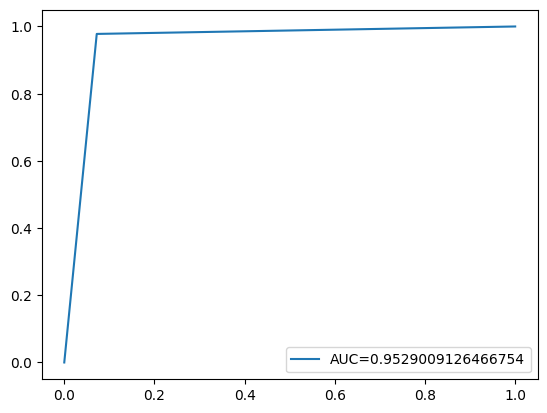

In [22]:
# ROC
y_pred_proba = log_regression.predict_proba(x_test_resample)[::,1]
fpr, tpr, optimal_threshold = metrics.roc_curve(y_test_resample,  y_prod_optimal)
auc = metrics.roc_auc_score(y_test_resample, y_prod_optimal)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Fonction appliquée à la régression logistique pour prédir la probabilité

In [23]:
def prediction(user_id, product_id, log_regression, data):
    x_prod = data[(data['user_id'] == int(user_id)) & (data['product_id'] == int(product_id))]
    
    # Sélectionner les colonnes caractéristiques
    X_user = x_prod
    X_user = X_user.drop(["Date","Time","event_type","user_id","product_id","price","is_purchase","user_session"],axis=1)
    
    # Prédire la probabilité
    proba = log_regression.predict_proba(X_user)[:, 1]
    
    return proba[0]

In [24]:
# Utilisation de la fonction 
user_id = 1515915625519390366
product_id = 3828758
probabilité = prediction(user_id, product_id, log_regression, data)
print(f'La Probabilité pour que id {user_id} achete le {product_id}: est de {probabilité}')

La Probabilité pour que id 1515915625519390366 achete le 3828758: est de 0.002314426408860632
